In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movie = pd.read_csv('./data/IMDB-Movie-Data.csv')
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# 我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [4]:
# 平均分
movie['Rating'].mean()

6.723200000000003

In [5]:
# 所有导演的名字，经过去重
# np.unique(movie['Director'])
# 所有导演人数
np.unique(movie['Director']).shape[0]

644

# 对于这一组电影数据，如果我们想Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

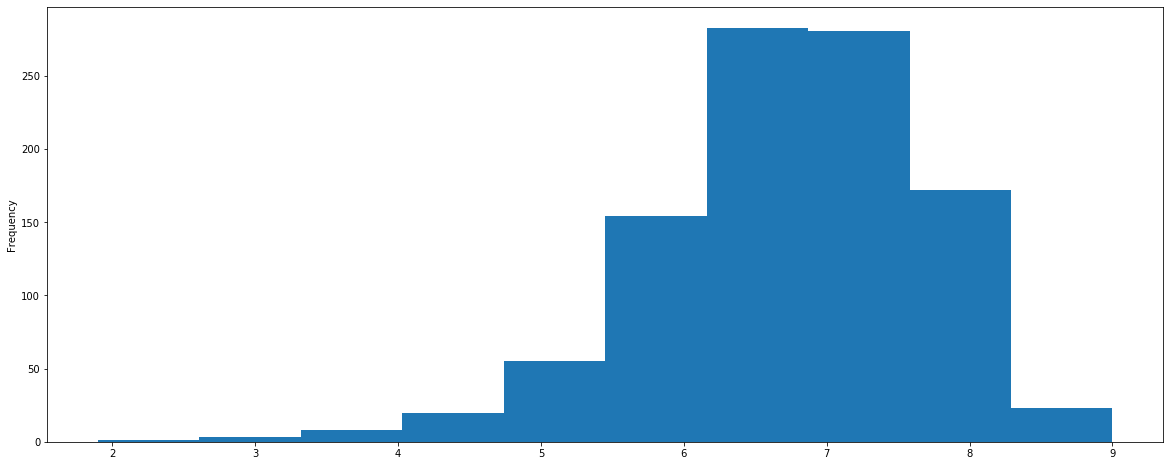

In [6]:
# Rating分布
movie['Rating'].plot(kind='hist', figsize=(20,8))
plt.show()

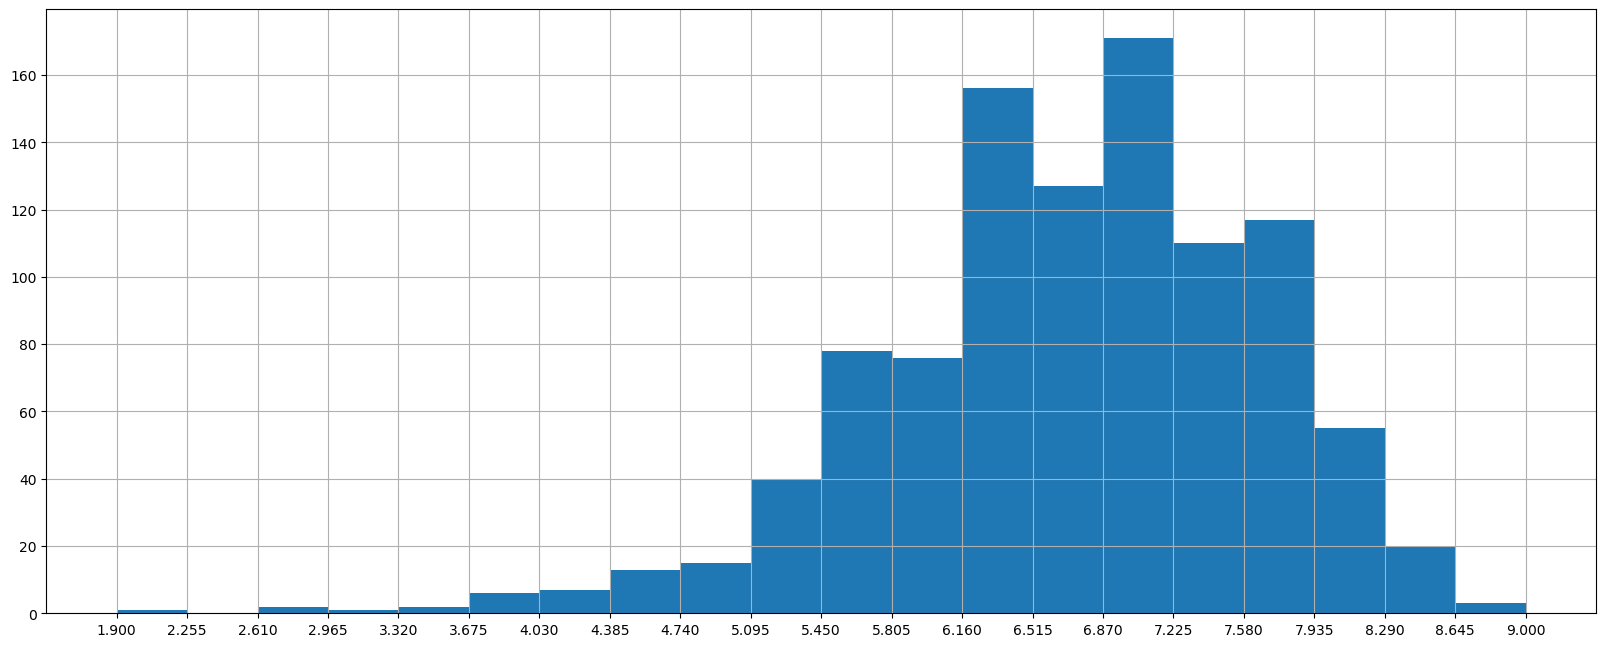

In [7]:
# 1.创建画布
plt.figure(figsize=(20,8), dpi=100)

# 2.绘制图像
plt.hist(movie['Rating'].values, bins=20)

# 2.1添加刻度
max_ = movie['Rating'].max()
min_ = movie['Rating'].min()
t1 = np.linspace(min_, max_, num=21)

plt.xticks(t1)
# 2.2添加网格
plt.grid()

# 显示图像
plt.show()

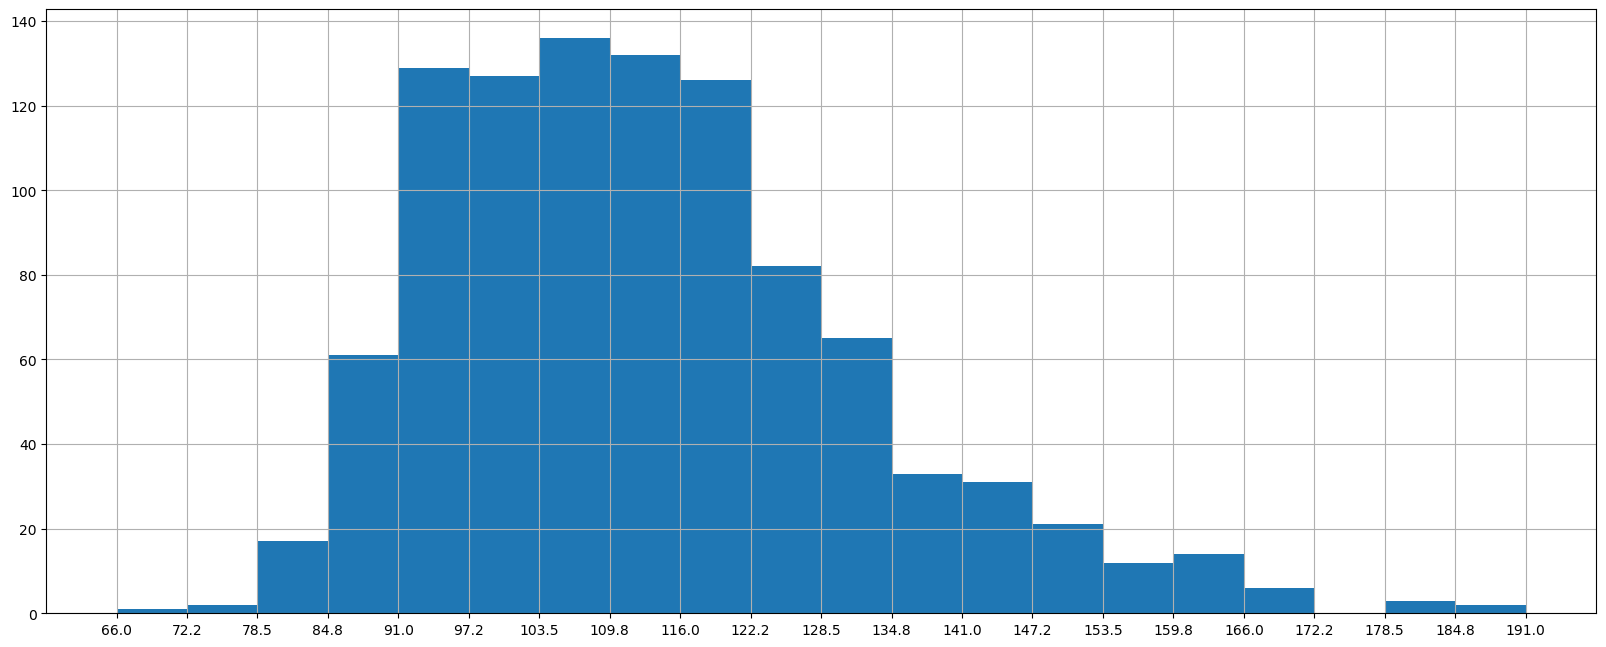

In [8]:
# 1.创建画布
plt.figure(figsize=(20,8), dpi=100)

# 2.绘制图像
plt.hist(movie['Runtime (Minutes)'].values, bins=20)

# 2.1添加刻度
max_ = movie['Runtime (Minutes)'].max()
min_ = movie['Runtime (Minutes)'].min()
# 分组要多1
t1 = np.linspace(min_, max_, num=21)

plt.xticks(t1)
# 2.2添加网格
plt.grid()

# 显示图像
plt.show()

# 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [9]:
# 获取电影分类
temp_list = [i.split(',') for i in movie['Genre']]
# temp_list

In [10]:
genre_list = np.unique([i for j in temp_list for i in j])
genre_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [11]:
movie.shape
genre_list.shape
np.zeros([10,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [12]:
# 建立一个1000行（电影数量），20列的0（类别数量）
zeros = np.zeros([movie.shape[0], genre_list.shape[0]])
zeros

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# 添加列索引，电影类别
temp_movie = pd.DataFrame(zeros, columns=genre_list)
temp_movie

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# 把第i行电影的电影类别置为1
for i in range(1000):
    # 第i行，第i个电影的类别 置为1
    temp_movie.ix[i, temp_list[i]] = 1

D:\Package\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [15]:
temp_movie.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 求和各电影类别的数量倒序排列
genre = temp_movie.sum().sort_values(ascending=False)
genre

Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64

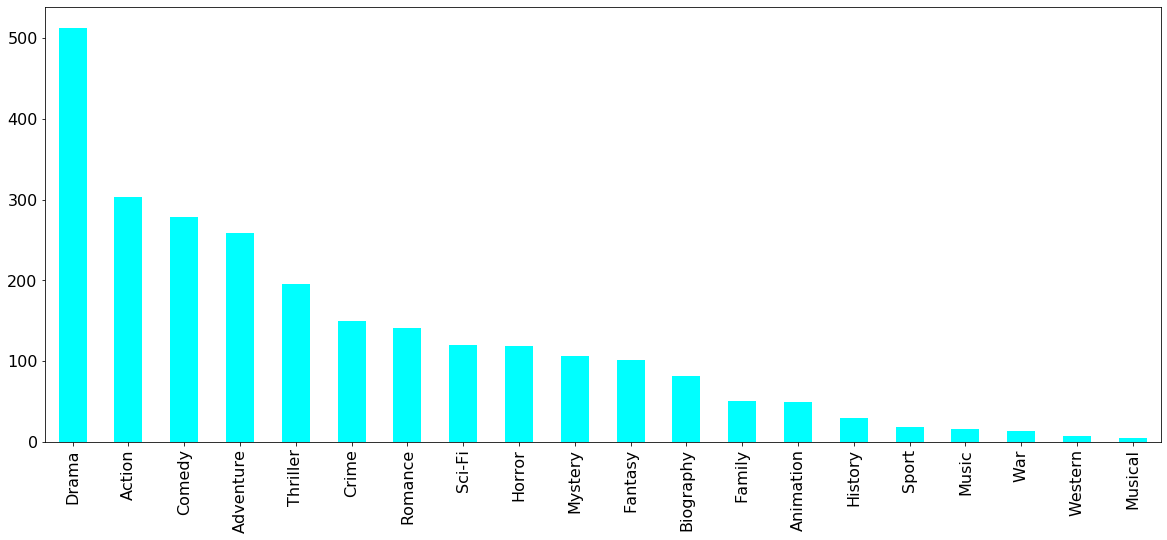

In [44]:
genre.plot(kind='bar', colormap='cool', figsize=(20,8), fontsize=16)